### Câu 2 - Game of Thones dialogue

##### Cho dữ liệu Game_of_Thrones_jon_snow_data.csv thực hiện các yêu cầu sau

In [44]:
from wordcloud import WordCloud, STOPWORDS 
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('data/Game_of_Thrones_jon_snow_data.csv', names=['Names']) # đọc data csv
data.head()

,Names
0,JON: Go on. Father’s watching.\r\n
1,JON: And your mother.\r\n
2,"JON: Don’t think too much, Bran.\r\n"
3,"JON/ROBB: Quick, Bran, faster!\r\n"
4,JON (to BRAN): Don’t look away.\r\n


In [39]:
data.tail()

,Names
1133,"JON: You can come see me, you know, at Castle ..."
1134,JON: You think anyone will dare tell you women...
1135,JON: (chuckles) I don't know.\r\n
1136,JON: You have your Needle?\r\n
1137,JON: Your Grace. I'm sorry I wasn't there when...


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   1138 non-null   object
dtypes: object(1)
memory usage: 9.0+ KB


In [41]:
#  thực hiện chuẩn hóa (loại bỏ phần văn bản subject trước dấu : và các ký tự đặc biệt như \r, \n)
data['Names'] = data['Names'].str.extract(':(.*?)(?=\r\n)') # Replace bằng RegEx
data

,Names
0,Go on. Father’s watching.
1,And your mother.
2,"Don’t think too much, Bran."
3,"Quick, Bran, faster!"
4,Don’t look away.
...,...
1133,"You can come see me, you know, at Castle Black."
1134,You think anyone will dare tell you women are...
1135,(chuckles) I don't know.
1136,You have your Needle?


In [47]:
text_data = ''.join(data['Names']) # merge dataframe trên thành 1 text thống nhất
text_data = text_data.replace("\'", "") # remove các ký tự sở hữu cách vdu: I'm, I'll, ....
text_data

' Go on. Father’s watching. And your mother. Don’t think too much, Bran. Quick, Bran, faster! Don’t look away. Father will know if you do. You did well. What is it? Now there are five. You want to hold it? Lord Stark? There are five pups. One for each of the Stark children. The direwolf is the sigil of your House. They were meant to have them. I’m not a Stark. Get on. Why’s your mother so dead-set on us getting pretty for the king? Uncle Benjen! Lady Stark thought it might insult the royal family to seat a bastard in their midst. So take me with you when you go back. Father will let me if you ask him, I know he will. I’m ready to swear your oath. I don’t care about that. What’re you doing back there? You’re Tyrion Lannister. The queen’s brother? Lord Eddard Stark is my father. What the hell do you know about being a bastard? I already have one. Of course I have. Weve guarded the Kingdoms for 8 000 years. Soon enough. Its good youve got help.  Impressive.  I have something for you. And 

In [48]:
# Tạo WordCloud
stopwords = set(STOPWORDS) # loại bỏ các từ không quan trọng
wc = WordCloud(background_color='white', max_words=200, stopwords=stopwords)

wc.generate(text_data)

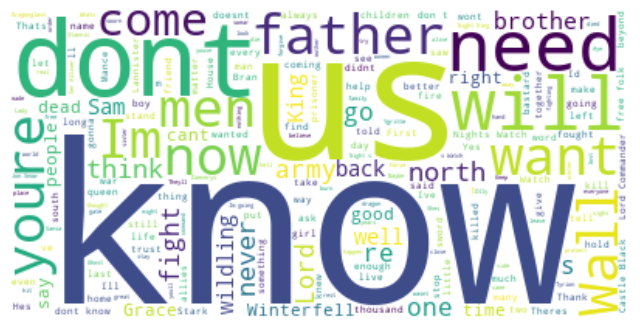

In [71]:
# hiển thị kết quả wordcloud
plt.figure(figsize=(8,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### vẽ wordcloud trên với mask là hình nền là tập tin hình ảnh jon-snow.jpg

In [62]:
import numpy as np
from PIL import Image

In [64]:
# load Image
img_mask = np.array(Image.open('data/jon-snow.jpg'))
img_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

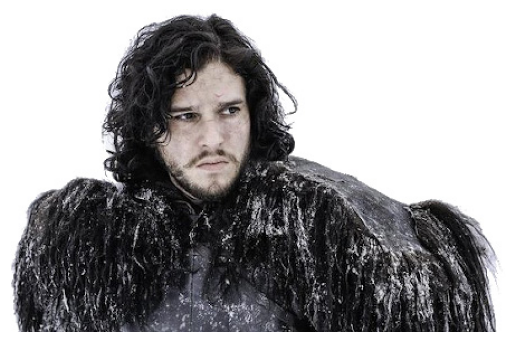

In [67]:
plt.imshow(img_mask) # load thử image mask
plt.axis('off')
plt.show()

In [68]:
# load word cloud vào mask này
wc_mask = WordCloud(background_color='white', mask=img_mask, max_words=200, stopwords=stopwords)
wc_mask.generate(text_data)

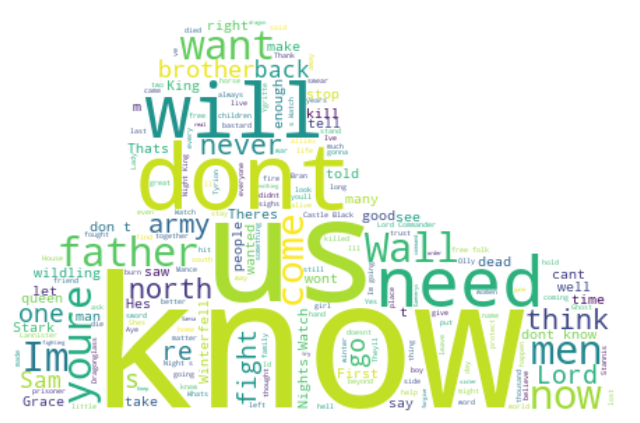

In [72]:
# hiển thị kết quả wordcloud
plt.figure(figsize=(8,10))
plt.imshow(wc_mask, interpolation='bilinear')
plt.axis('off')
plt.show()